In [16]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

from keras.models import Model
from keras.preprocessing import image

import time
import numpy as np
from keras import layers
#from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [17]:
path = 'C:\\Users\\Eliza Marie\\Anaconda\\fish or not'
#C:\Users\Eliza Marie\Anaconda\train_folder
train_datagen = ImageDataGenerator(rescale=1. / 255)
#change to categorical
train = train_datagen.flow_from_directory(path, target_size=(227,227), class_mode='binary')

Found 476 images belonging to 2 classes.


In [18]:
type(train)

keras.preprocessing.image.DirectoryIterator

In [19]:
type(train_datagen)

keras.preprocessing.image.ImageDataGenerator

In [20]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32,)
Image Size of first image :  (227, 227, 3)
Output of first image :  ()


Text(0.5, 1.0, '1.0')

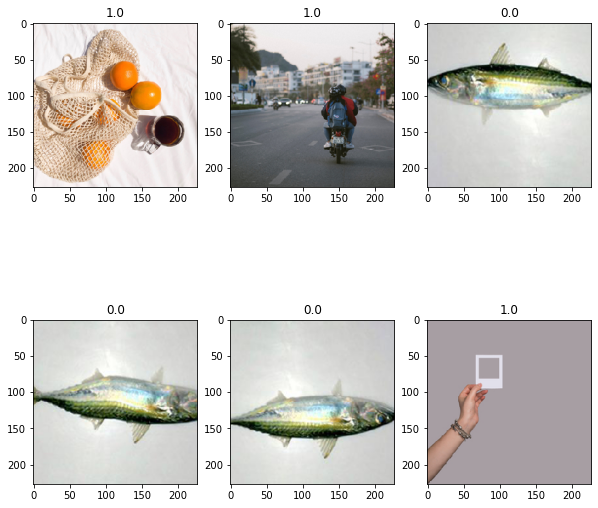

In [21]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])
axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])
axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])
axs[1][1].imshow(train[0][0][25])
axs[1][1].set_title(train[0][1][25])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

In [31]:
input_shape = train[0][0].shape[1:]
X_input =  Input(train[0][0].shape[1:])

NameError: name 'Input' is not defined

In [30]:
#dense_layers =[0]
#layer_sizes=[64]
#conv_layers =[3]
    
#for dense_layer in dense_layers:
#    for layer_size in layer_sizes:
#       for conv_layer in conv_layers:
NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
tensorboard = TensorBoard(log_dir='logs2/{}'.format(NAME))
print(NAME)
                
model= Sequential()

model.add(Conv2D(96,(11,11),strides = 4,name="conv0")(X_input))
model.add(BatchNormalization(axis = 3 , name = "bn0")(X))
model.add(Activation('relu')(X))
    
model.add(MaxPooling2D((3,3),strides = 2,name = 'max0')(X))

model.add(Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X))
model.add(BatchNormalization(axis = 3 ,name='bn1')(X))
model.add(Activation('relu')(X))
    
model.add(MaxPooling2D((3,3),strides = 2,name = 'max1')(X))

model.add(Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X))
model.add(BatchNormalization(axis = 3, name = 'bn2')(X))
model.add(Activation('relu')(X))

model.add(Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X))
model.add(BatchNormalization(axis = 3, name = 'bn3')(X))
model.add(Activation('relu')(X))

model.add(Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X))
model.add(BatchNormalization(axis = 3, name = 'bn4')(X))
model.add(Activation('relu')(X))

model.add(MaxPooling2D((3,3),strides = 2,name = 'max2')(X))

model.add(Flatten()(X))

model.add(Dense(4096, activation = 'relu', name = "fc0")(X))

model.add(Dense(4096, activation = 'relu', name = 'fc1')(X))

model.add(Dense(1,activation='softmax',name = 'fc2')(X))
            
model.compile(loss = "binary_crossentropy",
                         optimizer="adam",
                         metrics=["Accuracy"])
            
model.fit(train, batch_size = 32, epochs = 1, validation_split=0.1, callbacks=[tensorboard])

3-conv-64-nodes-0-dense-1675147535


ValueError: Layer "conv0" expects 1 input(s), but it received 3 input tensors. Inputs received: [<tf.Tensor: shape=(), dtype=int32, numpy=227>, <tf.Tensor: shape=(), dtype=int32, numpy=227>, <tf.Tensor: shape=(), dtype=int32, numpy=3>]